In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(-26.2512994055826, 25.24626761449349),
 (-43.667753232300775, -149.56137350774208),
 (14.293071836574839, -41.62971590319273),
 (-85.06266552977105, -62.10267400769355),
 (9.528599846445019, 17.03169325965871),
 (73.15381229338766, 91.81963074230708),
 (79.36830412955362, 117.30040616109676),
 (29.82585529694991, 17.03300392552117),
 (-81.03990431847409, -108.47994409746693),
 (70.12420194535622, 88.72463549698415),
 (-30.82258573767495, 39.09295607585156),
 (25.042678155200406, -131.2372809353244),
 (-73.45412828281805, 7.392393681427961),
 (15.393914069685763, 48.12468459498902),
 (-65.79531013130705, -61.420923620438344),
 (43.631140448056954, 63.06758047223565),
 (4.87556079472931, 112.5633819665021),
 (44.341699854894046, 66.2866430709633),
 (-44.33913920147401, -15.13910423527571),
 (1.1119017291852202, 127.10873288252901),
 (-55.51278263240632, 108.09127563132648),
 (-12.651213137182722, -83.22991276856202),
 (40.76894590876293, -162.68261636970766),
 (52.041436987920264, -163

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
cities

['mmabatho',
 'mataura',
 'cayenne',
 'ushuaia',
 'goundi',
 'talnakh',
 'saskylakh',
 'waddan',
 'punta arenas',
 'richards bay',
 'lompoc',
 'hermanus',
 'sayyan',
 'dzhusaly',
 'miri',
 'shieli',
 'jamestown',
 'ternate',
 'albany',
 'huarmey',
 'kapaa',
 'bethel',
 'castro',
 'port alfred',
 'kasimov',
 'burnie',
 'khatanga',
 'asau',
 'airai',
 'thompson',
 'saint-leu',
 'hachioji',
 'mys shmidta',
 'mount darwin',
 'vila franca do campo',
 'hasaki',
 'jvari',
 'vila velha',
 'upernavik',
 'deputatskiy',
 'caravelas',
 'tawkar',
 'dali',
 'goderich',
 'hambantota',
 'beatrice',
 'hilo',
 'east london',
 'manggar',
 'santa cruz de la palma',
 'palmer',
 'bengkulu',
 'vaini',
 'belushya guba',
 'avarua',
 'bulgan',
 'lavrentiya',
 'terrasini',
 'victoria',
 'nsanje',
 'atuona',
 'yabelo',
 'souillac',
 'russell',
 'slave lake',
 'busselton',
 'san patricio',
 'tumannyy',
 'sao filipe',
 'dingle',
 'agutaya',
 'illoqqortoormiut',
 'alice springs',
 'aviles',
 'narok',
 'nome',
 'iked

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a223963a9ff2a5739e2391ad3040da99


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Import the datetime module from the datetime library.
from datetime import datetime

Beginning Data Retrieval     
-----------------------------


In [12]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
set_count = 1
record_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mmabatho
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | goundi
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | waddan
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | lompoc
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | sayyan
Processing Record 14 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 15 of Set 1 | miri
Processing Record 16 of Set 1 | shieli
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | ternate
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | huarmey
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | bethel
Processing Record 23 of Set 1 | cast

Processing Record 39 of Set 4 | hihifo
City not found. Skipping...
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | barrow
Processing Record 45 of Set 4 | kuche
City not found. Skipping...
Processing Record 46 of Set 4 | abbeville
Processing Record 47 of Set 4 | nelson bay
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | berlevag
Processing Record 50 of Set 4 | talah
City not found. Skipping...
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | banamba
Processing Record 4 of Set 5 | cabo san lucas
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | saleaula
City not found. Skipping...
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | kapuskasing
Processing Record 9 of Set 5 | lamu
Processing Record 1

Processing Record 29 of Set 8 | kromberk
Processing Record 30 of Set 8 | birao
Processing Record 31 of Set 8 | preetz
Processing Record 32 of Set 8 | eureka
Processing Record 33 of Set 8 | senanga
Processing Record 34 of Set 8 | banjarmasin
Processing Record 35 of Set 8 | genhe
Processing Record 36 of Set 8 | shemonaikha
Processing Record 37 of Set 8 | maralal
Processing Record 38 of Set 8 | pullman
Processing Record 39 of Set 8 | port macquarie
Processing Record 40 of Set 8 | borsad
Processing Record 41 of Set 8 | saint-denis
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | skjervoy
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8 | abong mbang
Processing Record 46 of Set 8 | darhan
Processing Record 47 of Set 8 | dunedin
Processing Record 48 of Set 8 | leningradskiy
Processing Record 49 of Set 8 | tynda
Processing Record 50 of Set 8 | talara
Processing Record 1 of Set 9 | lasem
Processing Record 2 of Set 9 | berezovyy
Processing Record 3 of

Processing Record 15 of Set 12 | floro
Processing Record 16 of Set 12 | hamilton
Processing Record 17 of Set 12 | sri aman
Processing Record 18 of Set 12 | boquira
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | mayumba
Processing Record 21 of Set 12 | bad aussee
Processing Record 22 of Set 12 | asayita
City not found. Skipping...
Processing Record 23 of Set 12 | umm kaddadah
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | cajnice
Processing Record 26 of Set 12 | amderma
City not found. Skipping...
Processing Record 27 of Set 12 | fernie
Processing Record 28 of Set 12 | beyneu
Processing Record 29 of Set 12 | jubayl
City not found. Skipping...
Processing Record 30 of Set 12 | tungor
Processing Record 31 of Set 12 | jatiroto
Processing Record 32 of Set 12 | puerto madero
Processing Record 33 of Set 12 | buckeye
Processing Record 34 of Set 12 | kungurtug
Processing Record 35 of Set 12 | fernan-nunez
Processing Record 36 of Set 12 |

In [13]:
len(city_data)

568

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mmabatho,-25.85,25.63,46.40,39,0,4.70,ZA,2020-08-21 23:26:11
1,Mataura,-46.19,168.86,53.01,86,53,8.01,NZ,2020-08-21 23:26:11
2,Cayenne,4.93,-52.33,80.60,83,3,4.70,GF,2020-08-21 23:26:11
3,Ushuaia,-54.80,-68.30,41.00,75,75,8.05,AR,2020-08-21 23:26:11
4,Goundi,9.36,17.37,73.51,94,91,2.19,TD,2020-08-21 23:26:11
5,Talnakh,69.49,88.40,53.60,81,40,4.47,RU,2020-08-21 23:26:11
6,Saskylakh,71.92,114.08,39.96,78,2,4.50,RU,2020-08-21 23:26:11
7,Waddan,29.16,16.14,73.06,65,0,5.79,LY,2020-08-21 23:26:12
8,Punta Arenas,-53.15,-70.92,41.00,80,75,19.46,CL,2020-08-21 23:26:12
9,Richards Bay,-28.78,32.04,58.60,83,14,4.74,ZA,2020-08-21 23:26:12


In [15]:
new_column_order = ["City", "Country","Date",'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mmabatho,ZA,2020-08-21 23:26:11,-25.85,25.63,46.40,39,0,4.70
1,Mataura,NZ,2020-08-21 23:26:11,-46.19,168.86,53.01,86,53,8.01
2,Cayenne,GF,2020-08-21 23:26:11,4.93,-52.33,80.60,83,3,4.70
3,Ushuaia,AR,2020-08-21 23:26:11,-54.80,-68.30,41.00,75,75,8.05
4,Goundi,TD,2020-08-21 23:26:11,9.36,17.37,73.51,94,91,2.19
...,...,...,...,...,...,...,...,...,...
563,Yumen,CN,2020-08-21 23:26:58,40.28,97.20,71.33,34,100,5.75
564,Solnechnyy,RU,2020-08-21 23:26:58,50.72,136.63,65.35,59,68,3.89
565,Pangai,TO,2020-08-21 23:26:58,-19.80,-174.35,80.60,83,20,10.29
566,Manati,PR,2020-08-21 23:26:58,18.43,-66.49,82.40,88,75,11.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")



In [17]:
# Extract relevant fields form the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1598052418.3113508

In [19]:
lats

0     -25.85
1     -46.19
2       4.93
3     -54.80
4       9.36
       ...  
563    40.28
564    50.72
565   -19.80
566    18.43
567   -31.54
Name: Lat, Length: 568, dtype: float64

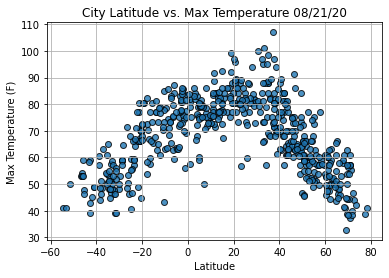

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

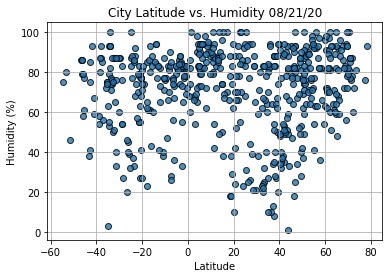

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

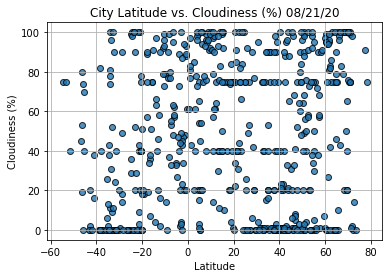

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

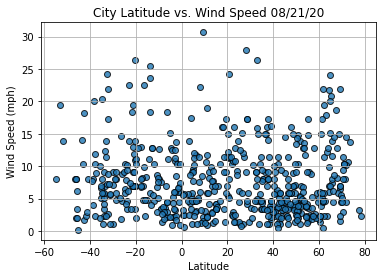

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [26]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

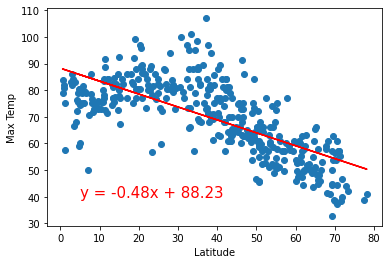

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,40))

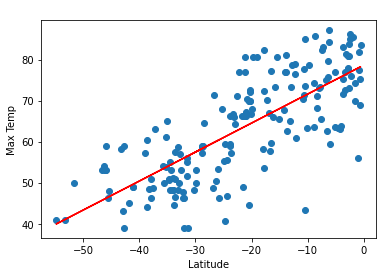

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

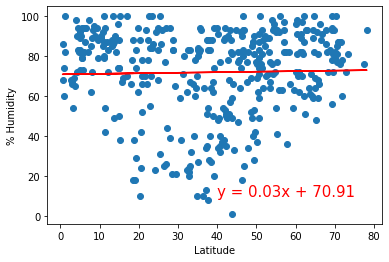

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

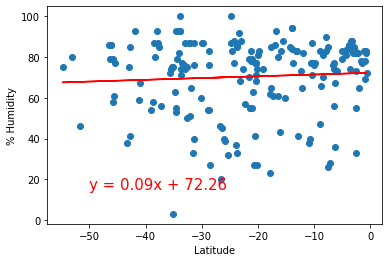

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

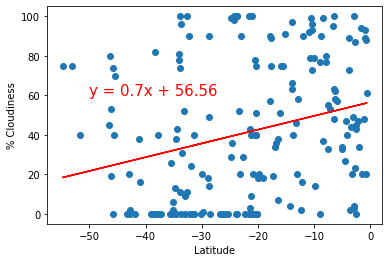

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

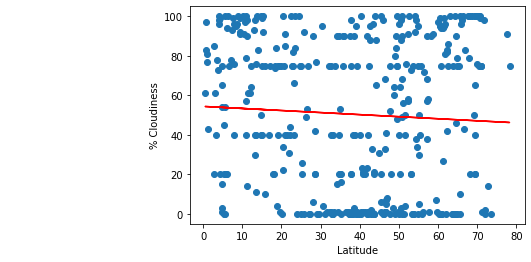

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

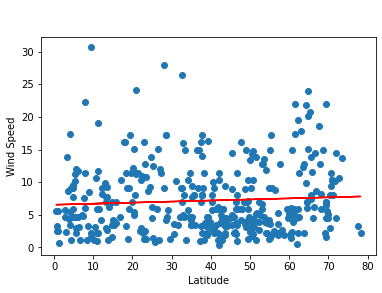

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

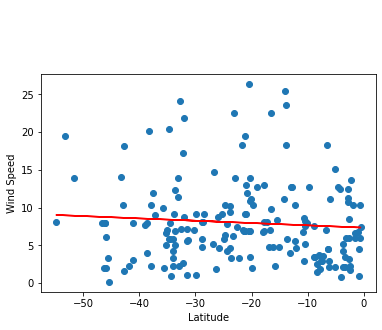

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))